This notebook reproduces plots in Figure 3 and S3.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import h5py
import glob

Figures 3B-C

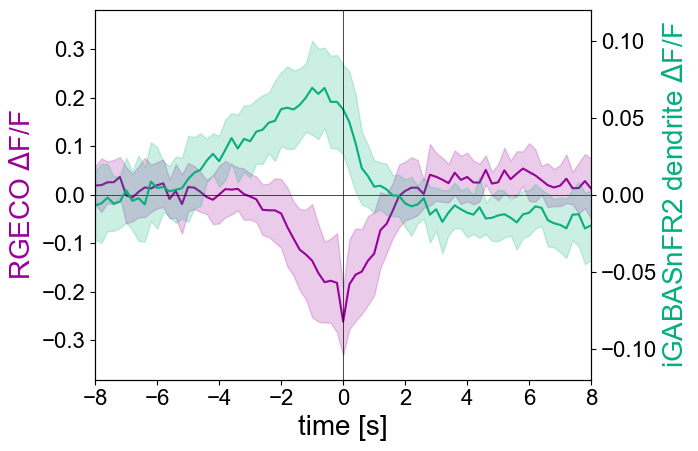

In [2]:
#Fig 3B
#load forwad wave RGECO iGABASNFR data of A02l in A3 segment
files = glob.glob('../data/Fig3_S3/Fig3BC_S3_data/fwd/*.h5')
#interlolating traces
ip1 = scipy.interpolate.interp1d
dt=0.2
time=np.arange(-50,50)*dt
iGABA_den_traces=[]
iGABA_ax_traces=[]
RGECO_ax_traces=[]
for file in files:
    data=h5py.File(file, 'r')
    for i in range(len(data['time'])):
        #lienarly interpolate the traces
        fitted_iGABA_den = ip1(data['time'][i]-0.5*(data['time'][i][1]-data['time'][i][0]), data['iGABA_den'][i]) 
        fitted_iGABA_ax = ip1(data['time'][i]-0.5*(data['time'][i][1]-data['time'][i][0]), data['iGABA_ax'][i]) 
        fitted_RGECO_ax= ip1(data['time'][i], data['RGECO_ax'][i])
        iGABA_den_traces.append(fitted_iGABA_den(time))
        iGABA_ax_traces.append(fitted_iGABA_ax(time))
        RGECO_ax_traces.append(fitted_RGECO_ax(time))                
    data.close()
iGABA_den_traces=np.array(iGABA_den_traces)
iGABA_ax_traces=np.array(iGABA_ax_traces)
RGECO_ax_traces=np.array(RGECO_ax_traces)
#plot mean traces
plt.rcParams["font.family"] = "Arial"
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(time, RGECO_ax_traces.mean(axis=0), c=(153/255,0, 153/255), label='RGECO A3')
ax1.fill_between(time, RGECO_ax_traces.mean(axis=0)+np.std(RGECO_ax_traces, axis=0), 
                 RGECO_ax_traces.mean(axis=0)-np.std(RGECO_ax_traces, axis=0), color=(153/255,0, 153/255), alpha=0.2)
ax2 = ax1.twinx()
ax2.plot(time, iGABA_den_traces.mean(axis=0), c=(3/255,175/255,122/255), label='iGABASnFR2 A3')
ax2.fill_between(time, iGABA_den_traces.mean(axis=0)+np.std(iGABA_den_traces, axis=0), 
                 iGABA_den_traces.mean(axis=0)-np.std(iGABA_den_traces, axis=0), color=(3/255,175/255,122/255), alpha=0.2)
ax1.axhline(0, c='k', lw=0.5)
ax2.axvline(0, c='k', lw=0.5)
plt.xlim(-8,8)

RGECO_min=np.min(RGECO_ax_traces.mean(axis=0)-np.std(RGECO_ax_traces, axis=0))
iGABA_den_max=np.max(iGABA_den_traces.mean(axis=0)+np.std(iGABA_den_traces, axis=0))
ax1.set_ylim(RGECO_min-0.05,-RGECO_min+0.05)
ax2.set_ylim(-iGABA_den_max-0.02,iGABA_den_max+0.02)
plt.setp(ax1.get_xticklabels(), fontsize=16)
plt.setp(ax1.get_yticklabels(), fontsize=16)
plt.setp(ax2.get_yticklabels(), fontsize=16)
ax1.set_xlabel('time [s]',fontsize=20)
ax1.set_ylabel(r'RGECO $\Delta$F/F', fontsize=20, c=(153/255,0, 153/255))
ax2.set_ylabel(r'iGABASnFR2 dendrite $\Delta$F/F', fontsize=20, c=(3/255,175/255,122/255))
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.savefig('figures/Fig3B.svg')

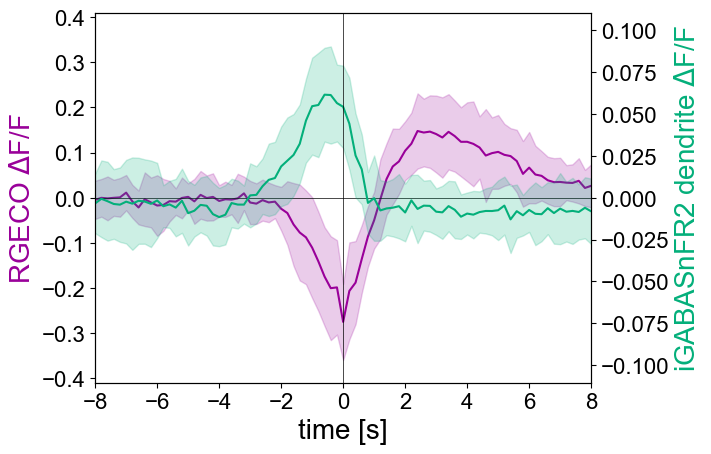

In [3]:
#Fig 3C
#load backward wave RGECO iGABASNFR data of A02l in A3 segment
files = glob.glob('../data/Fig3_S3/Fig3BC_S3_data/bwd/*.h5')
#interlolating traces
ip1 = scipy.interpolate.interp1d
dt=0.2
time=np.arange(-50,50)*dt
iGABA_den_traces=[]
iGABA_ax_traces=[]
RGECO_ax_traces=[]
for file in files:
    data=h5py.File(file, 'r')
    for i in range(len(data['time'])):
        #lienarly interpolate the traces
        fitted_iGABA_den = ip1(data['time'][i]-0.5*(data['time'][i][1]-data['time'][i][0]), data['iGABA_den'][i]) 
        fitted_iGABA_ax = ip1(data['time'][i]-0.5*(data['time'][i][1]-data['time'][i][0]), data['iGABA_ax'][i]) 
        fitted_RGECO_ax= ip1(data['time'][i], data['RGECO_ax'][i])
        iGABA_den_traces.append(fitted_iGABA_den(time))
        iGABA_ax_traces.append(fitted_iGABA_ax(time))
        RGECO_ax_traces.append(fitted_RGECO_ax(time))                
    data.close()
iGABA_den_traces=np.array(iGABA_den_traces)
iGABA_ax_traces=np.array(iGABA_ax_traces)
RGECO_ax_traces=np.array(RGECO_ax_traces)
#plot mean traces
plt.rcParams["font.family"] = "Arial"
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(time, RGECO_ax_traces.mean(axis=0), c=(153/255,0, 153/255), label='RGECO A3')
ax1.fill_between(time, RGECO_ax_traces.mean(axis=0)+np.std(RGECO_ax_traces, axis=0), 
                 RGECO_ax_traces.mean(axis=0)-np.std(RGECO_ax_traces, axis=0), color=(153/255,0, 153/255), alpha=0.2)
ax2 = ax1.twinx()
ax2.plot(time, iGABA_den_traces.mean(axis=0), c=(3/255,175/255,122/255), label='iGABASnFR2 A3')
ax2.fill_between(time, iGABA_den_traces.mean(axis=0)+np.std(iGABA_den_traces, axis=0), 
                 iGABA_den_traces.mean(axis=0)-np.std(iGABA_den_traces, axis=0), color=(3/255,175/255,122/255), alpha=0.2)
ax1.axhline(0, c='k', lw=0.5)
ax2.axvline(0, c='k', lw=0.5)
plt.xlim(-8,8)

RGECO_min=np.min(RGECO_ax_traces.mean(axis=0)-np.std(RGECO_ax_traces, axis=0))
iGABA_den_max=np.max(iGABA_den_traces.mean(axis=0)+np.std(iGABA_den_traces, axis=0))
ax1.set_ylim(RGECO_min-0.05,-RGECO_min+0.05)
ax2.set_ylim(-iGABA_den_max-0.02,iGABA_den_max+0.02)
plt.setp(ax1.get_xticklabels(), fontsize=16)
plt.setp(ax1.get_yticklabels(), fontsize=16)
plt.setp(ax2.get_yticklabels(), fontsize=16)
ax1.set_xlabel('time [s]',fontsize=20)
ax1.set_ylabel(r'RGECO $\Delta$F/F', fontsize=20, c=(153/255,0, 153/255))
ax2.set_ylabel(r'iGABASnFR2 dendrite $\Delta$F/F', fontsize=20, c=(3/255,175/255,122/255))
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.savefig('figures/Fig3C.svg')

Figures S3B-C

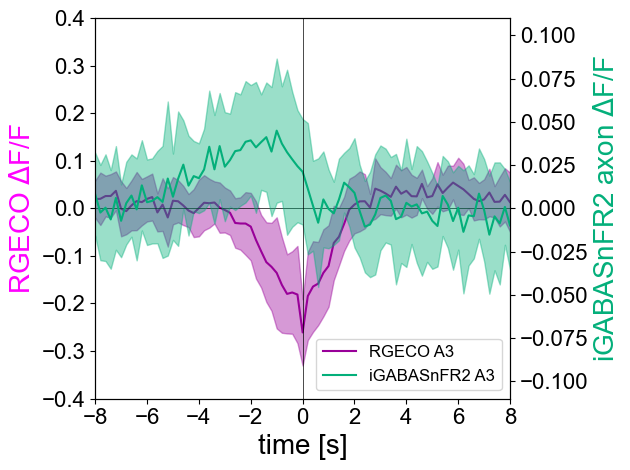

In [4]:
#Fig S3B
#load forwad wave RGECO iGABASNFR data of A02l in A3 segment
files = glob.glob('../data/Fig3_S3/Fig3BC_S3_data/fwd/*.h5')
#interlolating traces
ip1 = scipy.interpolate.interp1d
dt=0.2
time=np.arange(-50,50)*dt
iGABA_den_traces=[]
iGABA_ax_traces=[]
RGECO_ax_traces=[]
for file in files:
    data=h5py.File(file, 'r')
    for i in range(len(data['time'])):
        #lienarly interpolate the traces
        fitted_iGABA_den = ip1(data['time'][i]-0.5*(data['time'][i][1]-data['time'][i][0]), data['iGABA_den'][i]) 
        fitted_iGABA_ax = ip1(data['time'][i]-0.5*(data['time'][i][1]-data['time'][i][0]), data['iGABA_ax'][i]) 
        fitted_RGECO_ax= ip1(data['time'][i], data['RGECO_ax'][i])
        iGABA_den_traces.append(fitted_iGABA_den(time))
        iGABA_ax_traces.append(fitted_iGABA_ax(time))
        RGECO_ax_traces.append(fitted_RGECO_ax(time))                
    data.close()
iGABA_den_traces=np.array(iGABA_den_traces)
iGABA_ax_traces=np.array(iGABA_ax_traces)
RGECO_ax_traces=np.array(RGECO_ax_traces)
#plot mean traces
plt.rcParams["font.family"] = "Arial"
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(time, RGECO_ax_traces.mean(axis=0), c=(153/255,0, 153/255), label='RGECO A3')
ax1.fill_between(time, RGECO_ax_traces.mean(axis=0)+np.std(RGECO_ax_traces, axis=0), 
                 RGECO_ax_traces.mean(axis=0)-np.std(RGECO_ax_traces, axis=0), color=(153/255,0, 153/255), alpha=0.4)
ax2 = ax1.twinx()
ax2.plot(time, iGABA_ax_traces.mean(axis=0), c=(3/255,175/255,122/255), label='iGABASnFR2 A3')
ax2.fill_between(time, iGABA_ax_traces.mean(axis=0)+np.std(iGABA_ax_traces, axis=0), 
                 iGABA_ax_traces.mean(axis=0)-np.std(iGABA_ax_traces, axis=0), color=(3/255,175/255,122/255), alpha=0.4)
ax1.axhline(0, c='k', lw=0.5)
ax2.axvline(0, c='k', lw=0.5)
plt.xlim(-8,8)
ax1.set_ylim(RGECO_min-0.05,-RGECO_min+0.05)
ax2.set_ylim(-iGABA_den_max-0.02,iGABA_den_max+0.02)
plt.setp(ax1.get_xticklabels(), fontsize=16)
plt.setp(ax1.get_yticklabels(), fontsize=16)
plt.setp(ax2.get_yticklabels(), fontsize=16)
ax1.set_xlabel('time [s]',fontsize=20)
ax1.set_ylabel(r'RGECO $\Delta$F/F', fontsize=20, c='magenta')
ax2.set_ylabel(r'iGABASnFR2 axon $\Delta$F/F', fontsize=20, c=(3/255,175/255,122/255))
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='lower right', fontsize=12)
ax1.set_ylim(-0.4,0.4)
ax2.set_ylim(-0.11,0.11)
plt.tight_layout()
plt.savefig('figures/FigS3B.svg')

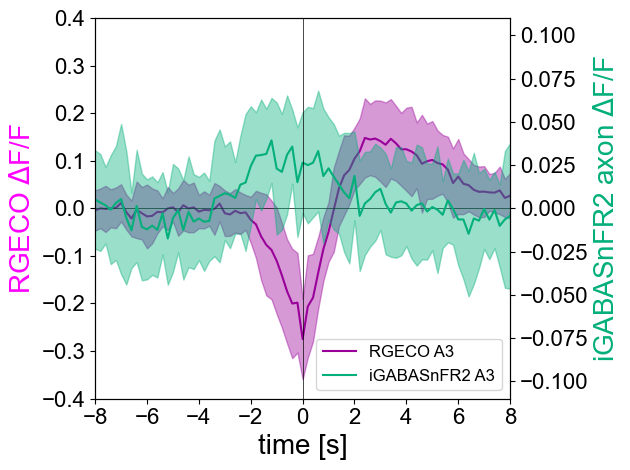

In [5]:
#Fig S3C
#load backward wave RGECO iGABASNFR data of A02l in A3 segment
files = glob.glob('../data/Fig3_S3/Fig3BC_S3_data/bwd/*.h5')
#interlolating traces
ip1 = scipy.interpolate.interp1d
dt=0.2
time=np.arange(-50,50)*dt
iGABA_den_traces=[]
iGABA_ax_traces=[]
RGECO_ax_traces=[]
for file in files:
    data=h5py.File(file, 'r')
    for i in range(len(data['time'])):
        #lienarly interpolate the traces
        fitted_iGABA_den = ip1(data['time'][i]-0.5*(data['time'][i][1]-data['time'][i][0]), data['iGABA_den'][i]) 
        fitted_iGABA_ax = ip1(data['time'][i]-0.5*(data['time'][i][1]-data['time'][i][0]), data['iGABA_ax'][i]) 
        fitted_RGECO_ax= ip1(data['time'][i], data['RGECO_ax'][i])
        iGABA_den_traces.append(fitted_iGABA_den(time))
        iGABA_ax_traces.append(fitted_iGABA_ax(time))
        RGECO_ax_traces.append(fitted_RGECO_ax(time))                
    data.close()
iGABA_den_traces=np.array(iGABA_den_traces)
iGABA_ax_traces=np.array(iGABA_ax_traces)
RGECO_ax_traces=np.array(RGECO_ax_traces)
#plot mean traces
plt.rcParams["font.family"] = "Arial"
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(time, RGECO_ax_traces.mean(axis=0), c=(153/255,0, 153/255), label='RGECO A3')
ax1.fill_between(time, RGECO_ax_traces.mean(axis=0)+np.std(RGECO_ax_traces, axis=0), 
                 RGECO_ax_traces.mean(axis=0)-np.std(RGECO_ax_traces, axis=0), color=(153/255,0, 153/255), alpha=0.4)
ax2 = ax1.twinx()
ax2.plot(time, iGABA_ax_traces.mean(axis=0), c=(3/255,175/255,122/255), label='iGABASnFR2 A3')
ax2.fill_between(time, iGABA_ax_traces.mean(axis=0)+np.std(iGABA_ax_traces, axis=0), 
                 iGABA_ax_traces.mean(axis=0)-np.std(iGABA_ax_traces, axis=0), color=(3/255,175/255,122/255), alpha=0.4)
ax1.axhline(0, c='k', lw=0.5)
ax2.axvline(0, c='k', lw=0.5)
plt.xlim(-8,8)
ax1.set_ylim(RGECO_min-0.05,-RGECO_min+0.05)
ax2.set_ylim(-iGABA_den_max-0.02,iGABA_den_max+0.02)
plt.setp(ax1.get_xticklabels(), fontsize=16)
plt.setp(ax1.get_yticklabels(), fontsize=16)
plt.setp(ax2.get_yticklabels(), fontsize=16)
ax1.set_xlabel('time [s]',fontsize=20)
ax1.set_ylabel(r'RGECO $\Delta$F/F', fontsize=20, c='magenta')
ax2.set_ylabel(r'iGABASnFR2 axon $\Delta$F/F', fontsize=20, c=(3/255,175/255,122/255))
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='lower right', fontsize=12)
ax1.set_ylim(-0.4,0.4)
ax2.set_ylim(-0.11,0.11)
plt.tight_layout()
plt.savefig('figures/FigS3C.svg')

Figures 3E-F

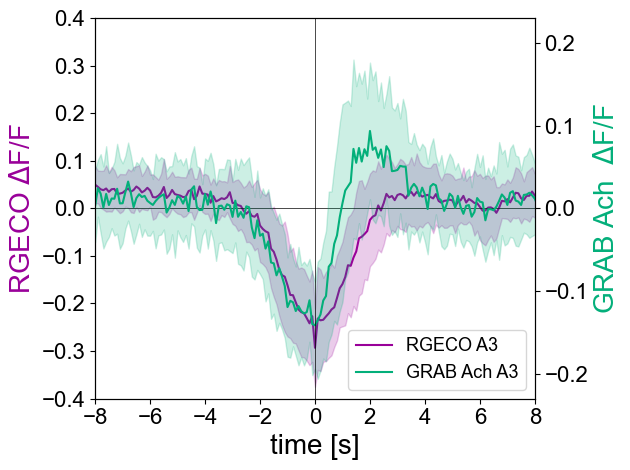

In [6]:
#Fig 3E
#load forward wave RGECO GRAB_Ach data of A02l in A3 segment
files=glob.glob('../data/Fig3_S3/Fig3EF_data/fwd/*.h5')
#iinterlolating traces
ip1 = scipy.interpolate.interp1d
dt=0.1
time=np.arange(-90,90)*dt
RGECO_traces=[]
Ach_traces=[]
for file in files:
    data=h5py.File(file, 'r')
    for i in range(len(data['time'])):
        #lienarly interpolate the traces
        fitted_Ach = ip1(data['time'][i], data['Ach'][i]) 
        fitted_RGECO= ip1(data['time'][i], data['RGECO'][i])
        Ach_traces.append(fitted_Ach(time))
        RGECO_traces.append(fitted_RGECO(time))
    data.close()
Ach_traces=np.array(Ach_traces)
RGECO_traces=np.array(RGECO_traces)
#plot mean traces
plt.rcParams["font.family"] = "Arial"
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(time, RGECO_traces.mean(axis=0), c=(153/255,0, 153/255), label='RGECO A3')
ax1.fill_between(time, RGECO_traces.mean(axis=0)+np.std(RGECO_traces, axis=0), 
                 RGECO_traces.mean(axis=0)-np.std(RGECO_traces, axis=0), color=(153/255,0, 153/255), alpha=0.2)
ax2 = ax1.twinx()
ax2.plot(time, Ach_traces.mean(axis=0), c=(3/255,175/255,122/255), label='GRAB Ach A3')
ax2.fill_between(time, Ach_traces.mean(axis=0)+np.std(Ach_traces, axis=0), 
                 Ach_traces.mean(axis=0)-np.std(Ach_traces, axis=0), color=(3/255,175/255,122/255), alpha=0.2)
ax1.axhline(0, c='k', lw=0.5)
ax2.axvline(0, c='k', lw=0.5)
plt.xlim(-8,8)

RGECO_min=np.min(RGECO_traces.mean(axis=0)-np.std(RGECO_traces, axis=0))
Ach_min=np.min(Ach_traces.mean(axis=0)-np.std(Ach_traces, axis=0))
ax1.set_ylim(RGECO_min-0.05,-RGECO_min+0.05)
ax2.set_ylim(Ach_min-0.02,-Ach_min+0.02)
plt.setp(ax1.get_xticklabels(), fontsize=16)
plt.setp(ax1.get_yticklabels(), fontsize=16)
plt.setp(ax2.get_yticklabels(), fontsize=16)
ax1.set_xlabel('time [s]',fontsize=20)
ax1.set_ylabel(r'RGECO $\Delta$F/F', fontsize=20, c=(153/255,0, 153/255))
ax2.set_ylabel(r'GRAB Ach  $\Delta$F/F', fontsize=20, c=(3/255,175/255,122/255))
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.set_ylim(-0.4,0.4)
ax2.set_ylim(-0.23,0.23)
ax1.legend(h1+h2, l1+l2, loc='lower right', fontsize=13)
plt.tight_layout()
plt.savefig('figures/Fig3E.svg')

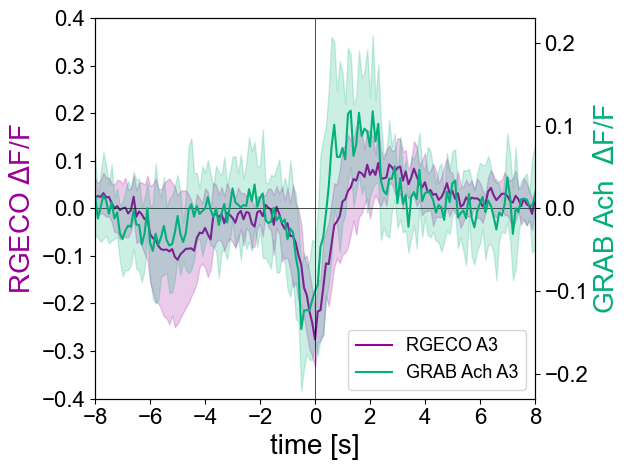

In [7]:
#Fig 3F
#load backward wave RGECO GRAB_Ach data of A02l in A3 segment
files=glob.glob('../data/Fig3_S3/Fig3EF_data/bwd/*.h5')
#iinterlolating traces
ip1 = scipy.interpolate.interp1d
dt=0.1
time=np.arange(-90,90)*dt
RGECO_traces=[]
Ach_traces=[]
for file in files:
    data=h5py.File(file, 'r')
    for i in range(len(data['time'])):
        #lienarly interpolate the traces
        fitted_Ach = ip1(data['time'][i], data['Ach'][i]) 
        fitted_RGECO= ip1(data['time'][i], data['RGECO'][i])
        Ach_traces.append(fitted_Ach(time))
        RGECO_traces.append(fitted_RGECO(time))
    data.close()
Ach_traces=np.array(Ach_traces)
RGECO_traces=np.array(RGECO_traces)
#plot mean traces
plt.rcParams["font.family"] = "Arial"
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(time, RGECO_traces.mean(axis=0), c=(153/255,0, 153/255), label='RGECO A3')
ax1.fill_between(time, RGECO_traces.mean(axis=0)+np.std(RGECO_traces, axis=0), 
                 RGECO_traces.mean(axis=0)-np.std(RGECO_traces, axis=0), color=(153/255,0, 153/255), alpha=0.2)
ax2 = ax1.twinx()
ax2.plot(time, Ach_traces.mean(axis=0), c=(3/255,175/255,122/255), label='GRAB Ach A3')
ax2.fill_between(time, Ach_traces.mean(axis=0)+np.std(Ach_traces, axis=0), 
                 Ach_traces.mean(axis=0)-np.std(Ach_traces, axis=0), color=(3/255,175/255,122/255), alpha=0.2)
ax1.axhline(0, c='k', lw=0.5)
ax2.axvline(0, c='k', lw=0.5)
plt.xlim(-8,8)

RGECO_min=np.min(RGECO_traces.mean(axis=0)-np.std(RGECO_traces, axis=0))
Ach_min=np.min(Ach_traces.mean(axis=0)-np.std(Ach_traces, axis=0))
ax1.set_ylim(RGECO_min-0.05,-RGECO_min+0.05)
ax2.set_ylim(Ach_min-0.02,-Ach_min+0.02)
plt.setp(ax1.get_xticklabels(), fontsize=16)
plt.setp(ax1.get_yticklabels(), fontsize=16)
plt.setp(ax2.get_yticklabels(), fontsize=16)
ax1.set_xlabel('time [s]',fontsize=20)
ax1.set_ylabel(r'RGECO $\Delta$F/F', fontsize=20, c=(153/255,0, 153/255))
ax2.set_ylabel(r'GRAB Ach  $\Delta$F/F', fontsize=20, c=(3/255,175/255,122/255))
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.set_ylim(-0.4,0.4)
ax2.set_ylim(-0.23,0.23)
ax1.legend(h1+h2, l1+l2, loc='lower right', fontsize=13)
plt.tight_layout()
plt.savefig('figures/Fig3F.svg')